In [11]:
import MlibWrapper as mlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from random import randint
from math import floor
import pickle

In [12]:
img_dim=75

img_train_num=14034
img_test_num=3000

def get_images(directory,number):
    images=np.empty([img_dim*img_dim*3,number],dtype=np.single,order='F')    
    labels=np.empty([number],dtype=np.single,order='F')
    label=0
    position=0

    path=Path(directory)
    
    # Building: 0, Forest: 1, Glacier:2, Mountain: 3 , Sea: 4, Street: 5
    for folder in path.iterdir():
        print(folder)
        if folder.name == 'buildings':
            label = 0
        elif folder.name == 'forest':
            label = 1
        elif folder.name == 'glacier':
            label = 2
        elif folder.name == 'mountain':
            label = 3
        elif folder.name == 'sea':
            label = 4
        elif folder.name == 'street':
            label = 5
        else:
            print("Error")

        for image_file in folder.iterdir():
            img=Image.open(str(image_file))
            img=img.resize((img_dim,img_dim),Image.BILINEAR)
            img=np.asarray((img))/255.0
            images[:,position]=np.reshape(img,(img_dim*img_dim*3),order='F')
            
            #images[:,position]=np.reshape(np.asarray((Image.open(str(image_file))).resize((img_dim,img_dim))),(img_dim*img_dim*3),order='F')
            labels[position]=label
            position=position+1

    print("Finished importing")
    idx = np.random.permutation(len(labels))
    return (images[:,idx], labels[idx])
    #return images, labels


In [13]:
def get_class_label(class_code):
    labels = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
    return labels[class_code]

In [14]:
train_images, train_labels = get_images('data/seg_train/',img_train_num)
train_images=train_images[:,0:3000]
train_labels=train_labels[0:3000]
test_images, test_labels = get_images('data/seg_test',img_test_num)
test_images=test_images[:,0:500]
test_labels=test_labels[0:500]

data/seg_train/forest
data/seg_train/buildings
data/seg_train/sea
data/seg_train/street
data/seg_train/glacier
data/seg_train/mountain
Finished importing
data/seg_test/forest
data/seg_test/buildings
data/seg_test/sea
data/seg_test/street
data/seg_test/glacier
data/seg_test/mountain
Finished importing


In [15]:
print("Shape of testing Images:",train_images.shape)
print("Shape of testing Labels:",train_labels.shape)
print("Shape of training Images:",test_images.shape)
print("Shape of training Labels:",test_labels.shape)

Shape of testing Images: (16875, 3000)
Shape of testing Labels: (3000,)
Shape of training Images: (16875, 500)
Shape of training Labels: (500,)


sea
[0.69411767 0.7058824  0.7294118  ... 0.21960784 0.59607846 0.5686275 ]


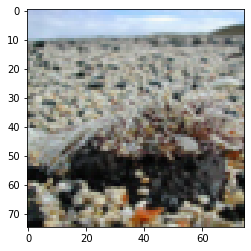

In [16]:
pic=9
print(get_class_label(train_labels[pic]))
plt.imshow(np.reshape(train_images[:,pic],(img_dim,img_dim,3),order='F'))
print(train_images[:,pic])

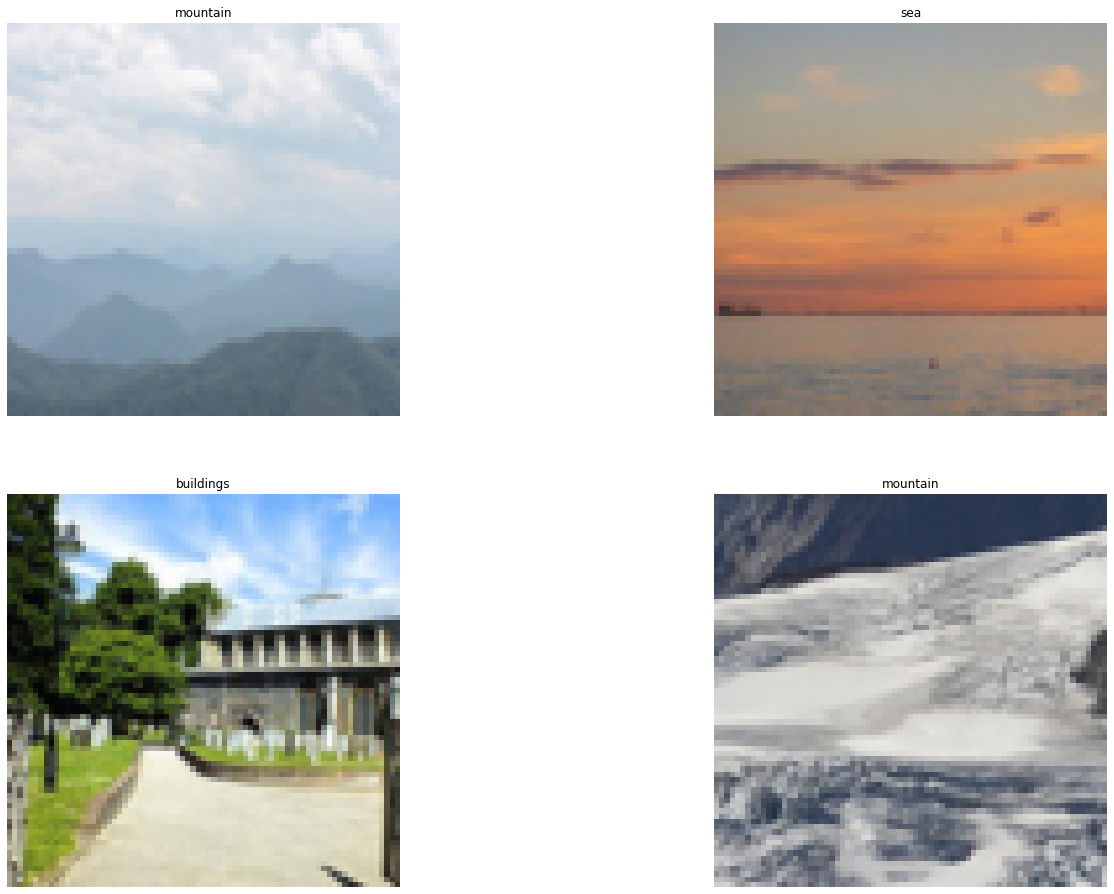

In [17]:
#from https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur/notebook
f,ax = plt.subplots(2,2)
f.subplots_adjust(0,0,3,3)
for i in range(0,2,1):
    for j in range(0,2,1):
        rnd_number = randint(0,3000)
        ax[i,j].imshow(np.reshape(train_images[:,rnd_number],(img_dim,img_dim,3),order='F'))
        ax[i,j].set_title(get_class_label(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [18]:
NN = mlib.NeuralNetwork()
NN.use_multiclass_loss()
NN.add_conv_layer(75,75,3,4,4,32,1,0)
NN.add_conv_layer(72,72,32,2,2,32,2,0)
NN.add_conv_layer(36,36,32,3,3,32,1,0)
NN.add_conv_layer(34,34,32,2,2,32,2,0)
NN.add_fc_layer(17*17*32,128)
NN.add_output_layer(128,6)
NN.layer_size()

Size:6


6

In [19]:
NN.check_network(img_dim*img_dim*3)

In [ ]:
epochs=10
batch_size=256
iterations=floor(img_train_num/batch_size)
print("Iterations per epoch: {}".format(iterations))
#iterations=15
accuracy=[]
error=[]
val_accuracy=[]
val_error=[]

for j in range(0,epochs):
    print("Epoch: {}".format(j))
    for i in range(0,iterations):
        #print("{}".format(i),end = '')
        NN.train_batch(train_images[:,i*batch_size:(i+1)*batch_size],train_labels[i*batch_size:(i+1)*batch_size])
        if(i % 10 ==0):
            print("Iteration: {}".format(i))
            acc=NN.get_current_accuracy(train_labels[i*batch_size:(i+1)*batch_size])
            print("Accuracy: {}".format(acc))
            err=NN.get_current_error(train_labels[i*batch_size:(i+1)*batch_size])
            print("Error: {}".format(err))
            accuracy.append(acc)
            error.append(err)
            
            #j=(int) (i/20)
            #b_size=i
            #NN.feed_forward_py(test_images[:,(j*b_size):((j+1)*b_size)])
            #acc=NN.get_current_accuracy(test_labels[j*b_size:(j+1)*b_size])
            #print("Val Accuracy: {}".format(acc))
            #err=NN.get_current_error(test_labels[j*b_size:(j+1)*b_size])
            NN.feed_forward_py(test_images[:])
            acc=NN.get_current_accuracy(test_labels[:])
            print("Val Accuracy: {}".format(acc))
            err=NN.get_current_error(test_labels[:])
            print("Val Error: {}".format(err))
            val_accuracy.append(acc)
            val_error.append(err)
                

Iterations per epoch: 54
Epoch: 0
Iteration: 0
Accuracy: 0.1171875
Error: 2.6085445880889893
Val Accuracy: 0.1599999964237213
Val Error: 5.920635223388672


In [20]:
# summarize history for accuracy
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch_epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(error)
plt.plot(val_error)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('batch_epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'accuracy' is not defined

In [23]:
weights=[]
bias=[]
for i in range(0,NN.layer_size()):
    weights.append(NN.get_layer_weights(i))
    bias.append(NN.get_layer_bias(i))
    
with open('weights.pickle', 'wb') as handle:
    pickle.dump(weights, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('bias.pickle', 'wb') as handle:
    pickle.dump(bias, handle, protocol=pickle.HIGHEST_PROTOCOL)



Size:6


In [24]:
with open('weights.pickle', 'rb') as handle:
    weights = pickle.load(handle)
with open('bias.pickle', 'rb') as handle:
    bias = pickle.load(handle)
    
for i in range(0,NN.layer_size()):
    NN.set_layer_weights(weights[i],i)
    NN.set_layer_bias(bias[i],i)

Size:6


sea


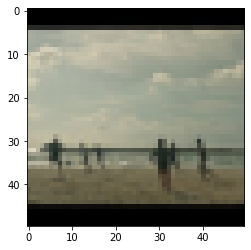

In [25]:
pic=58
print(get_class_label(labels[pic]))
plt.imshow(np.reshape(images[:,pic],(img_dim,img_dim,3),order='F'))